In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
%matplotlib inline

In [74]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/expenses.csv")

In [75]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [77]:
# Get unique count for each variable
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [78]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
df['sex'].value_counts().sort_values()

female    662
male      676
Name: sex, dtype: int64

In [80]:
df['smoker'].value_counts().sort_values()

yes     274
no     1064
Name: smoker, dtype: int64

In [81]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [82]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [83]:
#Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight','obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


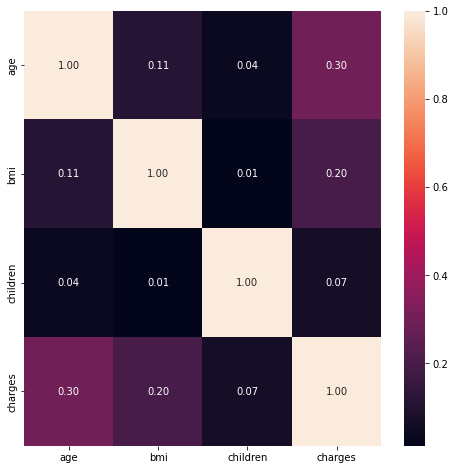

In [84]:
#Heatmap Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

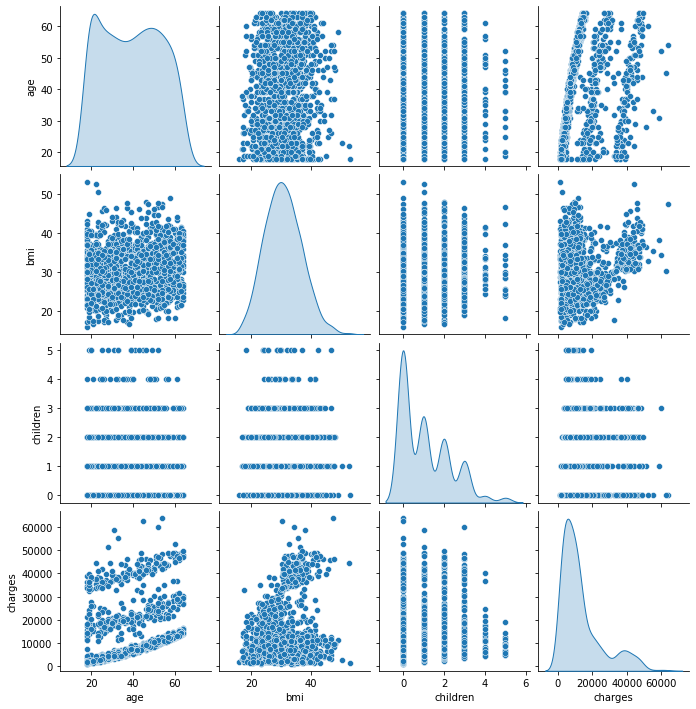

In [85]:
#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')

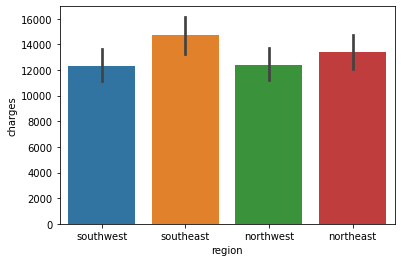

In [86]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = df)

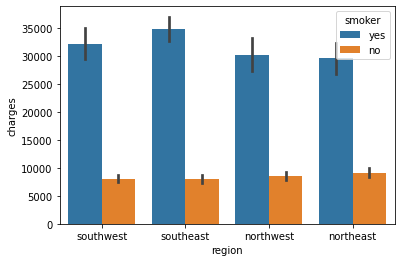

In [87]:
#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

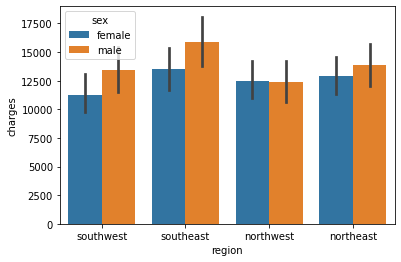

In [88]:
#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [89]:
# Mapping Sex to Integer
df['sex'] = df['sex'].replace({'male' : 0, 'female' : 1})

In [90]:
# Mapping smoker to Integer
df['smoker'] = df['smoker'].replace({'yes' : 0, 'no' : 1})

In [91]:
# Mapping weight_status to Integer
df['weight_status']=df['weight_status'].replace({'underweigth':0,'normal' :1,'overweight' :2, 'obese':3})

In [92]:
# Mapping region to Integer
df['region']=df['region'].replace({'northwest':0,'southwest' :1,'northeast':2,'southeast' :3 })

In [93]:
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,1,27.900,0,0,1,16884.92400,2
1,18,0,33.770,1,1,3,1725.55230,3
2,28,0,33.000,3,1,3,4449.46200,3
3,33,0,22.705,0,1,0,21984.47061,1
4,32,0,28.880,0,1,0,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,0,10600.54830,3
1334,18,1,31.920,0,1,2,2205.98080,3
1335,18,1,36.850,0,1,3,1629.83350,3
1336,21,1,25.800,0,1,1,2007.94500,2


In [94]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [95]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [96]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [97]:
x = df.drop(columns=['charges'])
y = df['charges']

In [101]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [102]:
# Checking split 
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (936, 7)
y_train: (936,)
x_test: (402, 7)
y_test: (402,)


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

In [115]:
# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("Linear Regression score :", r2)

Linear Regression score : 0.7546237655026821


In [116]:
y_test

1162    18963.17192
1191    13725.47184
134      2457.21115
722     12979.35800
1250    18648.42170
           ...     
796      4266.16580
0       16884.92400
111     11881.35800
18      10602.38500
42       6272.47720
Name: charges, Length: 402, dtype: float64

In [117]:
y_pred

array([ 8110.91842259,  5472.38695683,  2398.80412471, 15055.45350043,
       27000.68303787,  9549.29759621, 10957.3228429 ,  7635.11621789,
       10522.53867306,  1379.98025066, 27958.88351376, 24234.70474326,
       10365.6124511 ,  9556.15126982,  2179.28888046,  5372.10230363,
        2735.16400983, 26897.59196866,  6975.62135344,  3608.43796383,
        5383.55773561, 11486.13168432,  2585.46802302, 12340.22334338,
        8120.94601331,  6907.20785392, 11074.79672049, 38923.02908452,
        2345.64148113, 12753.89066627, 14044.60969782, 31796.2801959 ,
       15923.14498875,  2349.17564708, 12397.61579679,  4709.60301801,
        8603.94613742, 12229.73482363, 10504.99624763,  6446.65650515,
       27233.66547644, 29285.24059763,  3441.39311383, 13507.37397227,
       11583.1600102 , 34083.49340427, 11445.07761553,  3919.16941339,
       26941.04483422,  8490.34953697,   -83.28673379,  5942.98228154,
        9207.90528501, 31492.13600403,  1121.91253632,  3614.60868592,
      

In [118]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("SVR score :", r2)

SVR score : -0.19197249957154217


In [119]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regressor score :", r2)

Random Forest Regressor score : 0.8478037805790266


In [120]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("DTR score :", r2)

DTR score : 0.7390249752082101
